In [3]:
## Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Pandas
 
## Motivating Example
Today we are going to continue learning to apply python to data science by introducing another python library that is similar to `numpy` called `pandas`. 

>Consider: based on what we've learned the past several days, what are some *limitations* of `numpy`? Can you think of any tasks you might want to do or analysis you might like to perform that would be difficult with `numpy`? Does this give you a guess as to what `pandas` specializes in?

Answer: `numpy` is specialized primarily for numerical operations, e.g. matrix multiplication, vector math, etc., but is more limited when dealing with other data types such as string, python objects, etc. In contrast, `pandas` objects are able to handle mixed data easily! As you will often run into this type of data when doing bioinformatics, `pandas` can be very useful.

Before we dive into the syntax, let's take a look at an example real-world application of `pandas` for a task that you might commonly face in biology. We are going to use the "Palmer penguins" dataset, which is a collection of various biometric data for several different penguin species and is a commonly used example dataset. Let's take a quick look at what the data looks like.

In the Palmer penguins dataset, each row represents an individual penguin, and each column represent a different measurement or characteristic of the penguin, such as its body mass or island of origin. The data are organized in this way so that variables (things we may want to compare against each other) are the columns while observations (the individual penguins) are the rows. This is a common way to organize data in data science and is called **tidy data**. Tidy data formatting also makes it easy to use code to manipulate and analyze, which we will see in this lesson. 


In [70]:
penguins = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2020/2020-07-28/penguins.csv')
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


Here is an example of a transformation that we will be able to do with `pandas` that would be difficult to do manually or with `numpy`. We can summarize the data by calculating the average body mass (in kg) of each penguin species, broken up by sex. Using a few lines of code we can go from our raw data to a table that looks like this:


| species   | sex    | body_mass_kg|
|-----------|--------|----------|
| Adelie    | female | 3.368836 |
| Adelie    | male   | 4.043493 |
| Chinstrap | female | 3.527206 |
| Chinstrap | male   | 3.938971 |
| Gentoo    | female | 4.679741 |
| Gentoo    | male   | 5.484836 |


Now, let's get started learning how this is done!


## Pandas Series
A `Series` is the simplest data structure in Pandas. They are one dimensional (1D) objects composed of a **single data type** of any variety (string, integers); you can basically think of them as a single column in a spreadsheet. They are similar to arrays in `numpy`, however unlike those other 1D structures Series also have **label-based indexing**, meaning each element in the object can be accessed by specifying its specific label. In that way, they are similar to dictionaries in python. 

We can manually create a Series in several ways:

Using the `pd.Series()` function, we provide it the data we want to store as a list, and optionally we can give each row of the data a label using the `index` argument. If we don't give it the index argument, it will automatically assign a numerical index to each row starting from 0. 

When we print the Series, it will display as a column with the index on the left and the data on the right. The type of data being held in the series will be displayed at the bottom of the output. 


In [20]:
#Using the pd.Series method:
s0 = pd.Series([10, 20, 30, 40])

print(s0)


0    10
1    20
2    30
3    40
dtype: int64


In [17]:
#Using the pd.Series method:
s1 = pd.Series([10, 20, 30, 40], index=['a', 'b', 'c', 'd'])

print(s1)


a    10
b    20
c    30
d    40
dtype: int64


Another way to create a Series is to convert a (non-nested) dictionary into a Series. The keys of the dictionary will become the index labels while the values will become the data. 

In [18]:
# Converting from dictionary to series
my_dictionary = {'first': 10, 'second': 20, 'third': 30}
s2 = pd.Series(my_dictionary)

print(s2)

first     10
second    20
third     30
dtype: int64


We can then access specific elements in the Series by referring to its index label enclosed in quotes and brackets. This is very similar to how a dictionary works!

In [21]:
print(s0[0])

print(s1["a"])

print(s2["second"])

10
10
20


### Multi-indexed Series

Series objects may have multiple levels of indices. We call this **multi-indexed**. Using layers of indexing is a way of representing two-dimensional data within a one-dimensional `Series` object. Some people really like using multi-indexed Series. You can create a multi-indexed series by passing a list of lists to the `index` argument of the `pd.Series()` function. The first list will be the outermost level of the index, the second list will be the next level, and so on.

In [35]:
my_index = [["California", "California", "New York", "New York", "Texas", "Texas"], 
            [2001, 2002, 2001, 2002, 2001, 2002]]
my_values = [1.5, 1.7, 3.6, 4.2, 3.2, 4.5]

s3 = pd.Series(my_values, index=my_index)

print(s3)


California  2001    1.5
            2002    1.7
New York    2001    3.6
            2002    4.2
Texas       2001    3.2
            2002    4.5
dtype: float64


Retrieving an item from this data structure is similar to a nested dictionary, using successive `[]` notation. Or, you can passs it a tuple. You must pass the index labels in the order they were created (left to right)

In [40]:
print(s3["California"])

print("---")
print(s3["California"][2001])

print("---")
print(s3[("California", 2001)])

print("---")
# you can also use slicing to select multiple elements
print(s3["California":"New York"])


2001    1.5
2002    1.7
dtype: float64
---
1.5
---
1.5
---
California  2001    1.5
            2002    1.7
New York    2001    3.6
            2002    4.2
dtype: float64


In our work, we typically don't use multi-indexed Series. However, they are often the output of pandas functions, so it's good to know how to work with them. If you don't like the idea of multi-indexed Series, you can always convert them to a DataFrame using the `reset_index()` method.

In [41]:
s3.reset_index()

,level_0,level_1,0
0,California,2001,1.5
1,California,2002,1.7
2,New York,2001,3.6
3,New York,2002,4.2
4,Texas,2001,3.2
5,Texas,2002,4.5


## Pandas DataFrame

While Series is a "one-dimensional" data structure, DataFrames are two-dimensional. Where Series can only contain one type of data, the pandas DataFrame can have a combination of numerical and categorical data. Additionally, DataFrames allow you do have labels for your rows and columns. 

DataFrames are essentially a **collection of Series objects**. You can also think of python DataFrames as spreadsheets from Excel or dataframes from R. 

Let's manually create a simple dataframe in pandas to showcase their behavior. In the below code, we create a dictionary where the keys are the column names and the values are lists of data. We then pass this dictionary to the `pd.DataFrame()` function to create a DataFrame. 

When we print the DataFrame, it will display as a table with the column names at the top and the data below. The index (in this case, automatically generated numerical index starting at 0) will be displayed on the left side of the table.

In [42]:
tournamentStats = {
    "wrestler": ["Terunofuji", "Ura", "Shodai", "Takanosho"],
    "wins": [13, 6, 10, 12],
    "rank": ["yokozuna", "maegashira2", "komusubi", "maegashira6"]
}

#Converting to a pandas DataFrame
sumo = pd.DataFrame(tournamentStats)

print(sumo)

     wrestler  wins         rank
0  Terunofuji    13     yokozuna
1         Ura     6  maegashira2
2      Shodai    10     komusubi
3   Takanosho    12  maegashira6


Pandas dataframes have many **attributes**, including `shape`, `columns`, `index`, `dtypes`. These are useful for understanding the structure of the dataframe.

In [47]:
print(sumo.shape)

print("---")
print(sumo.columns)

print("---")
print(sumo.index)

print("---")
print(sumo.dtypes)

(4, 3)
---
Index(['wrestler', 'wins', 'rank'], dtype='object')
---
RangeIndex(start=0, stop=4, step=1)
---
wrestler    object
wins         int64
rank        object
dtype: object


Pandas DataFrames also have the handy `info()` function that summarizes the contents of the dataframe, including counts of the non-null values of each column and the data type of each column.

In [66]:
sumo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   wrestler  4 non-null      object
 1   wins      4 non-null      int64 
 2   rank      4 non-null      object
dtypes: int64(1), object(2)
memory usage: 228.0+ bytes


## Selecting data in a Pandas dataframe

As with series objects, pandas dataframes rows and columns are *explicitly indexed*, which means that every row and column has a label associated with it. You can think of the explicit indices as the being the names of the rows and the names of the columns.  

Unfortunately, in pandas the syntax for subsetting rows v.s. columns is different and can get a little confusing, so let's go through several different use cases.

### Selecting columns
We can always check the names of the columns in a Pandas dataframe byt using the built-in `.columns` method, which simply lists the column index:

In [11]:
sumo.columns

Index(['wrestler', 'wins'], dtype='object')

If we want to refer to a specific column, we can specify its index (enclosed in double quotes) inside of square brackets `[]` like so:

In [52]:
#Single column:
sumo["wrestler"]

0    Terunofuji
1           Ura
2        Shodai
3     Takanosho
Name: wrestler, dtype: object

If we want to refer to *multiple* columns, we need to pass the columns as a **list** by enclosing the column indices in square brackets, so you will end up with *double brackets*:

In [51]:
#Multiple columns (note the double []!):
sumo[["wrestler", "rank"]]

,wrestler,rank
0,Terunofuji,yokozuna
1,Ura,maegashira2
2,Shodai,komusubi
3,Takanosho,maegashira6


### Selecting rows:

The syntax for selecting specific rows is slightly different. Let's first check the labels of the row index; to do this we use the `.index` method:

In [56]:
print(sumo.index)

RangeIndex(start=0, stop=4, step=1)


Here we can see that while the column index labels were strings, the row index labels are *numerical values*, in this case `0` thru `3`. If we wanted to pull out the first row, we need to specify its index label (`0`) in combination with the `.loc` method (which is required for rows): 

In [ ]:
sumo.loc[0]

If we want to select multiple rows, like with columns we need to pass it as a list using the double brackets. If we want to specify a **range** of rows (i.e. from this row to that row), we **don't** use double brackets and instead use `:`:

In [ ]:
print(sumo.loc[[0,1]])

In [ ]:

print(sumo.loc[0:2])

Note that in this case the row index labels are numbers, but do not have to be numerical, and can have string labels similar to columns. Let's show how we could change the row index labels by taking the column with the wrestler's rank and setting it as the index label (note that the labels should be unique!):

In [13]:
sumo = sumo.set_index("rank")

print(sumo)

               wrestler  wins
rank                         
yokozuna     Terunofuji    13
maegashira2         Ura     6
komusubi         Shodai    10
maegashira6   Takanosho    12


In [14]:
sumo.loc["yokozuna"]

wrestler    Terunofuji
wins                13
Name: yokozuna, dtype: object

We also need to use `.loc` if we are referring to a specific row AND column, e.g.:

In [15]:
print(sumo.loc["komusubi", "wrestler"])

Shodai


If we want to purely use numerical indexing, we can use the `.iloc()` method. If you use `.iloc()`, you can index a DataFrame just as you would a numpy array. 

In [80]:
# Select the first two rows and the first two columns

sumo.iloc[0:2, 0:2]

,wrestler,wins
0,Terunofuji,13
1,Ura,6


There are many ways to select subsets of a dataframe. The rows and columns of a dataframe can be referred to either by their integer position or by their indexed name. Typically, for columns, you'll use the indexed name and can just do `[]` with the name of the column. For rows, if you want to use the integer position, you will use `.iloc[]`. If you want to use the index name, you will use `.loc[]`. 

For reference, here's a handy table on the best ways to index into a dataframe:

|Action|Named index|Integer Position|
|---|---|---|
|Select single column|`df['column_name']`|`df.iloc[:, column_position]`|
|Select multiple columns|`df[['column_name1', 'column_name2']]`|`df.iloc[:, [column_position1, column_position2]]`|
|Select single row|`df.loc['row_name']`|`df.iloc[row_position]`|
|Select multiple rows|`df.loc[['row_name1', 'row_name2']]`|`df.iloc[[row_position1, row_position2]]`|

> Exercise: we'll use the penguins dataset from our initial example.
> 1) Print the 'species' column
> 2) Print the first five columns and first five rows
> 3) Print the columns "species", "island", and "sex" and the first ten rows of the dataframe

In [73]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
 7   year               344 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 21.6+ KB


In [84]:
# Your code here

print(penguins['species'])

print("---")
print(penguins.iloc[0:5,0:5])

print("---")
print(penguins.loc[0:10, ['species', 'island', 'sex']])

0         Adelie
1         Adelie
2         Adelie
3         Adelie
4         Adelie
         ...    
339    Chinstrap
340    Chinstrap
341    Chinstrap
342    Chinstrap
343    Chinstrap
Name: species, Length: 344, dtype: object
---
  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm
0  Adelie  Torgersen            39.1           18.7              181.0
1  Adelie  Torgersen            39.5           17.4              186.0
2  Adelie  Torgersen            40.3           18.0              195.0
3  Adelie  Torgersen             NaN            NaN                NaN
4  Adelie  Torgersen            36.7           19.3              193.0
---
   species     island     sex
0   Adelie  Torgersen    male
1   Adelie  Torgersen  female
2   Adelie  Torgersen  female
3   Adelie  Torgersen     NaN
4   Adelie  Torgersen  female
5   Adelie  Torgersen    male
6   Adelie  Torgersen  female
7   Adelie  Torgersen    male
8   Adelie  Torgersen     NaN
9   Adelie  Torgersen     NaN
10  Ade

## Importing data to pandas
One of the most useful features of pandas DataFrames is its ability to easily perform complex data transformations. This makes it a powerful tool for cleaning, filtering, and summarizing tabular data. As shown above, we can manually create a DataFrame from scratch, but more commonly you will want to read in data from an external source, such as the output of a bioinformatic program, and do some manipulation of it. Let's read some data into a DataFrame to demonstrate. 

Below you can see an example of how to read files into pandas using the `pd.read_csv()` function. The `csv` stands for 'comma-separated values', which means by defaults it will assume that our columns are separated by **commas**; if we wanted to change the delimiter (e.g. in the case of a tab-separated file), we can set the delimiter explicitly using the `sep=` argument. 

In [39]:
penguins = pd.read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2020/2020-07-28/penguins.csv", sep=',')

# The head() function from pandas prints only the first N lines of a dataframe (default: 10)
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


When importing data into a DataFrame, pandas automatically detects what data type each column should be. For example, if the column contains only numbers, it will be imported as an floating point or integer data type. If the column contains strings or a mixture of strings and numbers, it will be imported as an "object" data type. Below are the different data types for the penguins column. 

In [85]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
 7   year               344 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 21.6+ KB


### Looping through a dataframe
As a note, if we want to go through a dataframe line-by-line (i.e. row by row), because both the rows and columns are indexed it requires slightly more syntax than looping through other data structures (e.g. a dictionary or list). Specifically we need to use the `.iterrows()` method to make the data frame iterable. The `.iterrows()` method outputs each row as a `Series` object with a row index and the column:   

In [ ]:
for index, row in penguins.iterrows():
    print(f"Row index: {index}, {row['species']}, {row['island']}")

This can be slow for very large dataframes, but is useful if you need to perform actions on individual rows.

## Modifying a dataframe
Now that we have our external data read into a DataFrame, we can begin to work our magic. If you have ever worked with `tidyverse` in the R language some of this might look familiar to you, as `pandas` serves a similar role and can do many of the same functions. Let's look at several useful common examples.

### Filtering
When we discussed indexing, we looked at how we can select specific rows and columns in a dataframe, but often we will want to select rows based on a certain condition, e.g. in the dataframe that we just imported, only take the rows where the 'body_mass_g' column has a value greater than a given number. We can do this easily by specifying which column to filter on and a boolean statement, like so:

In [86]:
print(penguins[penguins['flipper_length_mm'] == 181.0])

#Saving as new data frame:
penguins_filtered = penguins[penguins['body_mass_g'] > 3300]

penguins_filtered.head()

       species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0       Adelie  Torgersen            39.1           18.7              181.0   
6       Adelie  Torgersen            38.9           17.8              181.0   
38      Adelie      Dream            37.6           19.3              181.0   
58      Adelie     Biscoe            36.5           16.6              181.0   
108     Adelie     Biscoe            38.1           17.0              181.0   
293  Chinstrap      Dream            58.0           17.8              181.0   
296  Chinstrap      Dream            42.4           17.3              181.0   

     body_mass_g     sex  year  
0         3750.0    male  2007  
6         3625.0  female  2007  
38        3300.0  female  2007  
58        2850.0  female  2008  
108       3175.0  female  2009  
293       3700.0  female  2007  
296       3600.0  female  2007  


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,female,2007


We can get more advanced with our filtering logic by adding multiple conditions and the following logical operators:

- `&`: "and"
- `|`: "or"
- `~`: "not"

**Note that these are different logical operators than we have previously learned in base python!**

If using multiple conditions, be sure to enclose each of them in parentheses!

In [88]:
penguins_filtered = penguins[(penguins['body_mass_g'] > 3300) & (penguins['bill_length_mm'] > 38)]

penguins_filtered.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,female,2007
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,male,2007


Pandas also has a helper function called `.isin()` that is similar to the `in` operator in base python. It allows you to filter a dataframe based on whether a column value is in a list of values.

In [89]:
penguins[penguins['species'].isin(['Adelie', 'Gentoo'])]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...
271,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN,2009
272,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,female,2009
273,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,male,2009
274,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,female,2009


> Exercise: filter the dataframe to only keep the birds observed in the `year` 2007 and with a `bill_length_mm` greater than 38mm

In [93]:
# Your code here

penguins[(penguins["year"] == 2007) & (penguins["bill_length_mm"] > 38)]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,female,2007
...,...,...,...,...,...,...,...,...
297,Chinstrap,Dream,48.5,17.5,191.0,3400.0,male,2007
298,Chinstrap,Dream,43.2,16.6,187.0,2900.0,female,2007
299,Chinstrap,Dream,50.6,19.4,193.0,3800.0,male,2007
300,Chinstrap,Dream,46.7,17.9,195.0,3300.0,female,2007


We can also filter based on strings, not just numbers! For this, you will want to use a string matching function from python, such as `.str.contains()` (which also a partial match), `.str.startswith()` (checks to see if a value starts with a given string), or others.

In [107]:
penguins_filtered = penguins[penguins['species'].str.contains('Adel', case=False)]

penguins_filtered

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...
147,Adelie,Dream,36.6,18.4,184.0,3475.0,female,2009
148,Adelie,Dream,36.0,17.8,195.0,3450.0,female,2009
149,Adelie,Dream,37.8,18.1,193.0,3750.0,male,2009
150,Adelie,Dream,36.0,17.1,187.0,3700.0,female,2009


In the above example, this code looks for the string 'Adel' (case-insensitive, as we specify `case=False`) and only takes rows that contain the string somewhere in the `species` column.

#### Missing data in DataFrames

Missing data in a DataFrame is represeted by `NaN` (Not a Number). Pandas handles missing data in some specific ways, which we will discuss in this section. 

Missing numbers are propagated through the DataFrame when doing arithmetic operations. In the example below, when we try to sum the two columns together element-wise, any row where one of the columns has a missing value will result in the sum being `NaN`.

In [97]:
ser1 = pd.Series([np.nan, np.nan, 2, 3])
ser2 = pd.Series([1, 2, np.nan, 4])
ser1 + ser2

0    NaN
1    NaN
2    NaN
3    7.0
dtype: float64

When using descriptive statistics and computational methods like `.sum()`, `.mean()`, pandas will ignore missing values and treat them like zero. 

In [100]:
print(ser1.sum())

print(ser1.mean())

5.0
2.5


This behavior can be changed by using the `skipna` argument, which is `True` by default. If you set `skipna=False`, pandas will treat missing values as `NaN` and will not ignore them, resulting in the whole operation returning `NaN`.

In [102]:
print(ser1.mean(skipna=False))

nan



One very useful function to know is how to get rid of rows with missing data in them, as including them can often cause errors in downstream analysis or skew your results. There is a convenient function built in to `pandas` that does this called `.dropna()`. By default, it will drop any row that has a missing value in any column. This may not always be what you want. You can specify which columns to look at using the `subset` arugment. 

In [103]:
penguins_nona = penguins.dropna()

penguins_nona.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
 7   year               333 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 23.4+ KB


In [105]:
penguins_nona_bill_len = penguins.dropna(subset=["bill_length_mm"])

penguins_nona_bill_len.info()

<class 'pandas.core.frame.DataFrame'>
Index: 342 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            342 non-null    object 
 1   island             342 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
 7   year               342 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 24.0+ KB


Alternatively, you may want to fill in missing values with a specific value. You can do this using the `.fillna()` method.

### Calculating new columns

Let's say we will want to create a new column in our dataframe by applying some function to existing columns. For instance, in the dataframe of penguins data that we have been using, we want a column that normalizes `body_mass_g` column by performing a z-transform. A z-transform is the value minus the mean of the column divided by the standard deviation of the column. 

First, we put the name of the new column, `body_mass_z` in square brackets after our `penguin` DataFrame variable. Then we pull out the `body_mass_g` column and perform the calculation, using helper methods like `.mean()` and `.std()`, on the right side of the assignment operator. This syntax is similar to creating a new key in a dictionary.

In [111]:
# Z-transform the body mass column

penguins["body_mass_z"] = (penguins["body_mass_g"] - penguins["body_mass_g"].mean()) / penguins["body_mass_g"].std()

penguins.head(10)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,body_mass_z
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007,-0.563317
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007,-0.500969
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007,-1.186793
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007,-0.937403
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007,-0.688012
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,female,2007,-0.719186
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,male,2007,0.590115
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN,2007,-0.906229
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN,2007,0.060160


>**Exercise:** We can use multiple columns in the calculation of the new column. Create a column that contains the volume of the penguin's beak by assuming it is a cylinder, with `bill_length_mm` as the height and `bill_depth_mm` as the diameter. 
>
> **Hint:** The volume of a cylinder is given by the formula $V = \pi r^2 h$, where $r$ is the radius (half the diameter) and $h$ is the height.

![](https://allisonhorst.github.io/palmerpenguins/reference/figures/culmen_depth.png)

In [15]:
# Your code here

penguins["bill_volume"] = (penguins["bill_depth_mm"]/2)**2 * np.pi * penguins["bill_length_mm"]

penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,bill_volume
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007,10738.654055
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007,9392.592344
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007,10255.100899
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007,10736.693701


### Summarizing your data

Another common task in data analysis is to calculate summary statistics of your data. Pandas as a number of helper methods like `.mean()`, `.median()`, `.count()`, `unique()`, etc. that can be used to describe your data. Pandas DataFrames has a handy `.describe()` method that will give you a summary of the data in each column. By default, it will calculate the count, mean, standard deviation, minimum, 25th percentile, median, 75th percentile, and maximum of each numerical column. However, if you give it the `include='all'` or `include='object'` argument, it will also include the count, unique, top, and freq (of top) of each categorical column.

In [17]:
penguins.describe(include='all')

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,bill_volume
count,344,344,342.000000,342.000000,342.000000,342.000000,333,344.000000,342.000000
unique,3,3,NaN,NaN,NaN,NaN,2,NaN,NaN
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,male,NaN,NaN
freq,152,168,NaN,NaN,NaN,NaN,168,NaN,NaN
mean,NaN,NaN,43.921930,17.151170,200.915205,4201.754386,NaN,2008.029070,10216.041172
std,NaN,NaN,5.459584,1.974793,14.061714,801.954536,NaN,0.818356,2468.270185
min,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN,2007.000000,5782.155471
25%,NaN,NaN,39.225000,15.600000,190.000000,3550.000000,NaN,2007.000000,8433.676950
50%,NaN,NaN,44.450000,17.300000,197.000000,4050.000000,NaN,2008.000000,9954.426135
75%,NaN,NaN,48.500000,18.700000,213.000000,4750.000000,NaN,2009.000000,11537.641963


In [18]:
penguins.describe(include='object')

,species,island,sex
count,344,344,333
unique,3,3,2
top,Adelie,Biscoe,male
freq,152,168,168


### Grouping and transforming your data

What if we want to use one of the categorical variables in our data as a factor level to calculate our summaries? For example, we may want to separately get the mean flipper length of each `species` of penguin. In order to do this, we need to do the following things:

1. Split our data into different **groups** (e.g. based the values in the `species` column)
2. Apply some function (**aggregation** or **transformation**)to each group in our data (e.g. calculates the mean) 
3. Combine each group back together into an output object

We input the column we want to group by into the `.groupby()` method. This creates a **grouped dataframe** object that acts like the regular dataframe, but is split into groups based on the column we specified.

In [50]:
penguin_groups = penguins.groupby('species')
print(penguin_groups)


We can see that on its own this is not especially useful, as grouping the DataFrame does not produce a new DataFrame (just this weird output message telling us that this is a `DataFrameGroupBy` object). In order to output a DataFrame, we need to pass the grouped DataFrame to some function that aggregates or transforms the data in each group.

We group our data, select the column we want to aggregate (in this case, `flipper_length_mm`) and apply the `.mean()` function to it:

In [42]:
#Note the square brackets around the column name
penguins.groupby('species')['flipper_length_mm'].mean()

species
Adelie       189.953642
Chinstrap    195.823529
Gentoo       217.186992
Name: flipper_length_mm, dtype: float64

When we apply the `.mean()` method to the grouped dataframe, it returns a `Series` object with the mean flipper length of each species. The exact details of whether pandas returns a `groupby` object as a Series or a DataFrame gets a little technical; for our purposes, just know that you can make sure the returned object is converted to a DataFrame (which is usually most convenient) by using the `.reset_index` function:

In [55]:
penguins.groupby('species')['flipper_length_mm'].mean().reset_index()

,species,flipper_length_mm
0,Adelie,189.953642
1,Chinstrap,195.823529
2,Gentoo,217.186992


We can group by multiple columns by passing a *list of column names* to the `.groupby()` method (and using `reset_index()` as before to have it output as a DataFrame): 

In [56]:
penguins.groupby(['species', 'sex'])['flipper_length_mm'].mean().reset_index()

,species,sex,flipper_length_mm
0,Adelie,female,187.794521
1,Adelie,male,192.410959
2,Chinstrap,female,191.735294
3,Chinstrap,male,199.911765
4,Gentoo,female,212.706897
5,Gentoo,male,221.540984


So far we have just been applying the `.mean` function to our groups, but we can use other functions as well! One very useful function to know when grouping is `.size()`, which will return the number of rows in each group.

In [44]:
penguins.groupby(['species', 'sex']).size()

species    sex   
Adelie     female    73
           male      73
Chinstrap  female    34
           male      34
Gentoo     female    58
           male      61
dtype: int64

>**Exercise:** Use grouping to answer the following question about the penguins dataset: Which island has the most Adelie penguins?
>
> **Hint:** Think about which order you should group by for the most readable output

In [36]:
# Your code here

penguins.groupby(['species', 'island']).size()

species    island   
Adelie     Biscoe        44
           Dream         56
           Torgersen     52
Chinstrap  Dream         68
Gentoo     Biscoe       124
dtype: int64

> Now try your previous code with the order of the columns to group by switched. What changes?

In [38]:
penguins.groupby(['island', 'species']).size()

island     species  
Biscoe     Adelie        44
           Gentoo       124
Dream      Adelie        56
           Chinstrap     68
Torgersen  Adelie        52
dtype: int64

This shows us that grouping occurs **hierarchically**, meaning pandas groups data in the order that you specify in! In our case the result is the same (i.e. the counts are equal no matter which column you group on first), but one way is more readily readable for our question than the other. 


There are niche situations where it might matter, e.g. your aggregation function depends on the order of values (e.g. if you are sorting your grouped data), or you are doing some non-commutative operation, but generally speaking the results will be the same. 

> Exercise: now that we have an understanding of pandas, let's go back to our initial example! Calculating the average body mass (in **kg**) of each penguin species, by sex. We are aiming to reproduce the table below:
>
> Make sure you end up with a DataFrame and not a Series. 


| species   | sex    | body_mass_kg|
|-----------|--------|----------|
| Adelie    | female | 3.368836 |
| Adelie    | male   | 4.043493 |
| Chinstrap | female | 3.527206 |
| Chinstrap | male   | 3.938971 |
| Gentoo    | female | 4.679741 |
| Gentoo    | male   | 5.484836 |



In [50]:
penguins["body_mass_kg"] = penguins["body_mass_g"] / 1000

penguins.groupby(['species', 'sex'])["body_mass_kg"].mean().reset_index()

,species,sex,body_mass_kg
0,Adelie,female,3.368836
1,Adelie,male,4.043493
2,Chinstrap,female,3.527206
3,Chinstrap,male,3.938971
4,Gentoo,female,4.679741
5,Gentoo,male,5.484836


> **Exercise**: using the `.max()` function, find the largest bird on each island.

In [65]:
penguins.groupby('island')['body_mass_g'].max()

island
Biscoe       6300.0
Dream        4800.0
Torgersen    4700.0
Name: body_mass_g, dtype: float64

## Seaborn
### Plotting with Seaborn
In addition to knowing how to import and manipulate data, we often want to also *visualize* our data. There are many tools available that are specialized in plotting data, such a R and ggplot, Excel, etc., but often it can be helpful to do some quick visualization in python as part of a pipeline. The "classic" way to do this is using the `matplotlib` library, but for this workshop we are instead going to use `seaborn`, which is based on `matplotlib` but has (in our opinion) better syntax (being somewhat reminiscent of `ggplot`, a commonly-used R library), and is specially designed to integrate with `pandas`. 

 Plotting can get quite complicated, so we are going to stick to some more "cookie-cutter" implementation that is geared more towards exploratory analysis, rather than making publication-quality figures.

Just as before, it can be helpful to think about what your end goal looks like. Let's say I want to end up with a scatterplot that shows bird bill length relative to body weight, with the *color* of each point corresponding to bird species, and the *shape* of the point corresponding to bird sex. With that goal in mind, let's look at syntax.

### Defining the Data
We are going to continue using our penguins data set. `seaborn` has numerous functions for drawing different plots, summarized in the figure below. There are three different broad "families" of `seaborn` plots, which are shown in the figure below:


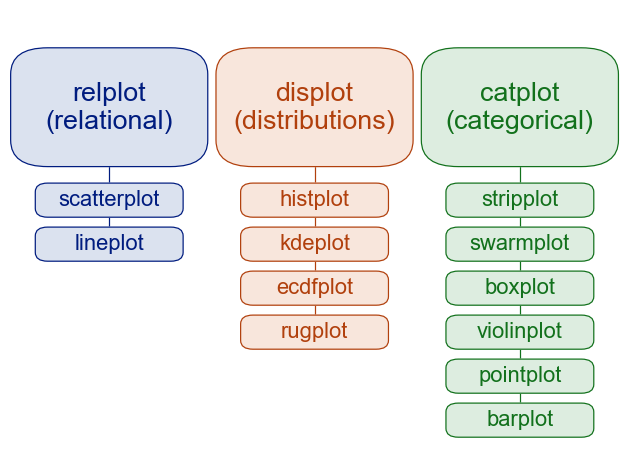

- `relplot` plots show relationships between variables
- `displot` show distibutions
- `catplot` plot categorical data 

Each plot function within a family usually has similar syntax, as they represent data in similar ways. To create a plot, we call one of these functions and specify our (`pandas`) dataframe and which columns to encode in which axis. For example, if we wanted a histogram:

In [66]:
penguins = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2020/2020-07-28/penguins.csv')
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


<Axes: xlabel='flipper_length_mm', ylabel='Count'>

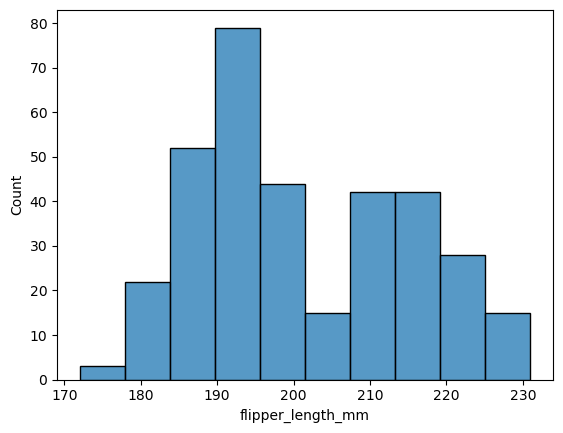

In [137]:
sns.histplot(data=penguins, x="flipper_length_mm")

We can see that for this type of plot, we only need to encode a single column (for the x-axis), but other types of plots might require additional axes. For example, a boxplot needs both an x and y axis defined:

<Axes: xlabel='species', ylabel='bill_length_mm'>

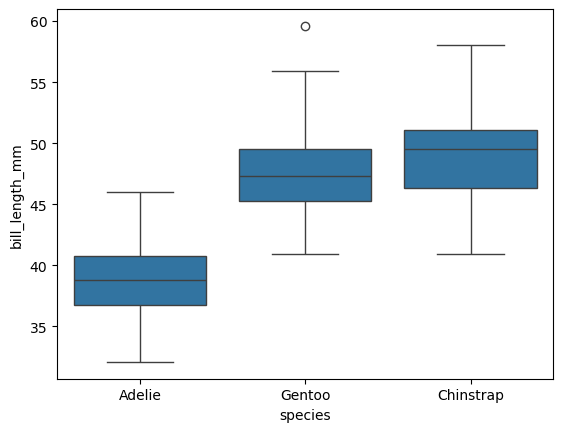

In [139]:
sns.boxplot(data=penguins,x="species",y="bill_length_mm")

Documentation for each plot type is on `seaborn`'s website, and it lists all required and optional arguments for each plot function: [seaborn](https://seaborn.pydata.org/index.html)

### Changing plot aesthetics
We can do much more useful things than just setting the x and y axis, however! We will frequently want to group our data, e.g. by species, by sex, etc., and change the plot aesthtics to reflect these groups. To do this, we add an additional argument that specifies which column in our data frame that we want to group on. For example, to color the bars on our histogram based on species, we would use the `hue` argument: 

<Axes: xlabel='flipper_length_mm', ylabel='Count'>

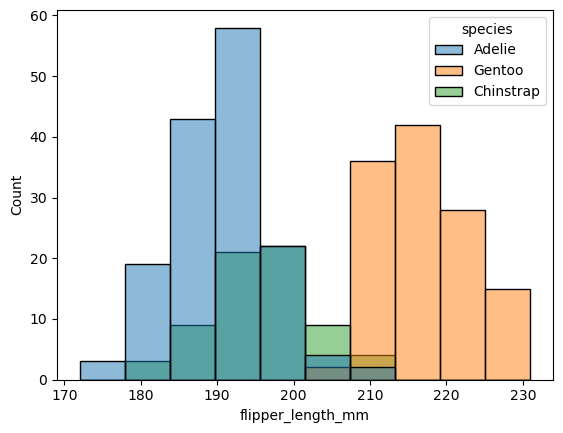

In [140]:
sns.histplot(data=penguins, x="flipper_length_mm",hue="species")

We can see we have changed the colors of the bars, but as they are overlapping it is difficult to read. If we dig into the documentation of the `histplot` function, we can find that there is also the `multiple` argument, which changes how overlapping bars behave...let's make them stack instead of overlap:

<Axes: xlabel='flipper_length_mm', ylabel='Count'>

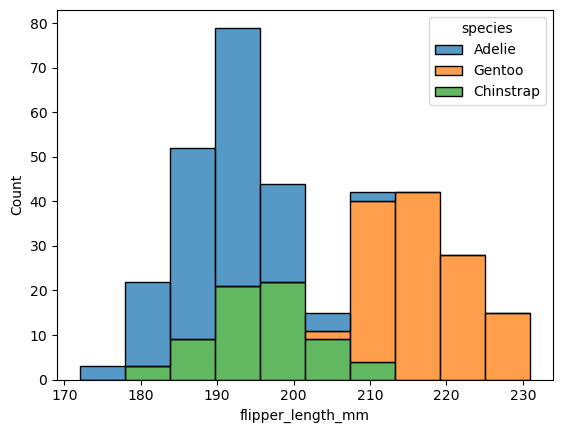

In [141]:
sns.histplot(data=penguins, x="flipper_length_mm",hue="species",multiple="stack")

>Exercise: check the documentation page for the `scatterplot` function, and see if you can figure out how to make a scatter plot that shows bird bill length relative to body weight, with the *color* of each point corresponding to bird species, and the *shape* of the point corresponding to bird sex.

<Axes: xlabel='bill_length_mm', ylabel='body_mass_g'>

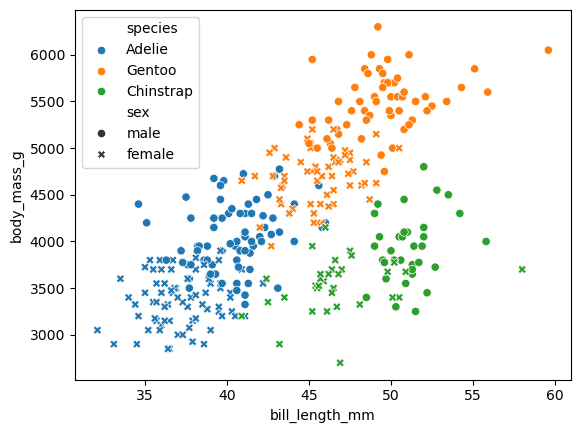

In [68]:
sns.scatterplot(data=penguins, x='bill_length_mm', y='body_mass_g', hue='species', style='sex')